In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

# Problem 1: A simple resampling example

## 1a. Generate a random sample from a normal distribution, of 14 numbers, with a mean of 10 and a scale somewhere between 1 and 5. Call this array `star`.
Think of this like the apparent magnitude of a nearby star that has a true apparent magnitude of 10, but we suspect that there's some variable dust component between us and the star, so we took a measurement every night for 14 days (two weeks).

In [2]:
star = np.random.normal(loc=10, scale=2, size=14)
print(star)
print(np.mean(star))

[ 9.97058069 11.4076584   9.90586506 10.94627636 12.98625071  9.97822775
 12.32547381  9.15909382 13.57492281 10.32316197  9.498954   10.31809939
  8.65893732  9.89578532]
10.639234815927145


This isn't enough data that we feel comfortable just averaging the magnitudes and computing an error from the distribution, but the star now is not visible from the telescope, so this data is all we have to work with. 

## 1b. Resample the data 5 times, with replacement, to get 5 different arrays of the same length as `star`, and calculate the mean of each resample.
Call your array of the mean of each resample `boots`. Hint: look up the documentation for `np.random.choice`.

In [3]:
boots = np.asarray([])
for i in range(5):
    temp = np.random.choice(star, size=len(star), replace=True)
    boots = np.append(boots, np.mean(temp))

In [4]:
print(boots)

[10.95636345 10.61977884 11.30538136 11.15618145 10.86080616]


## 1c. Make and plot a histogram of the bootstrap means.  
Also plot a vertical line at 10, the true magnitude of the star, and at the mean of your original data.

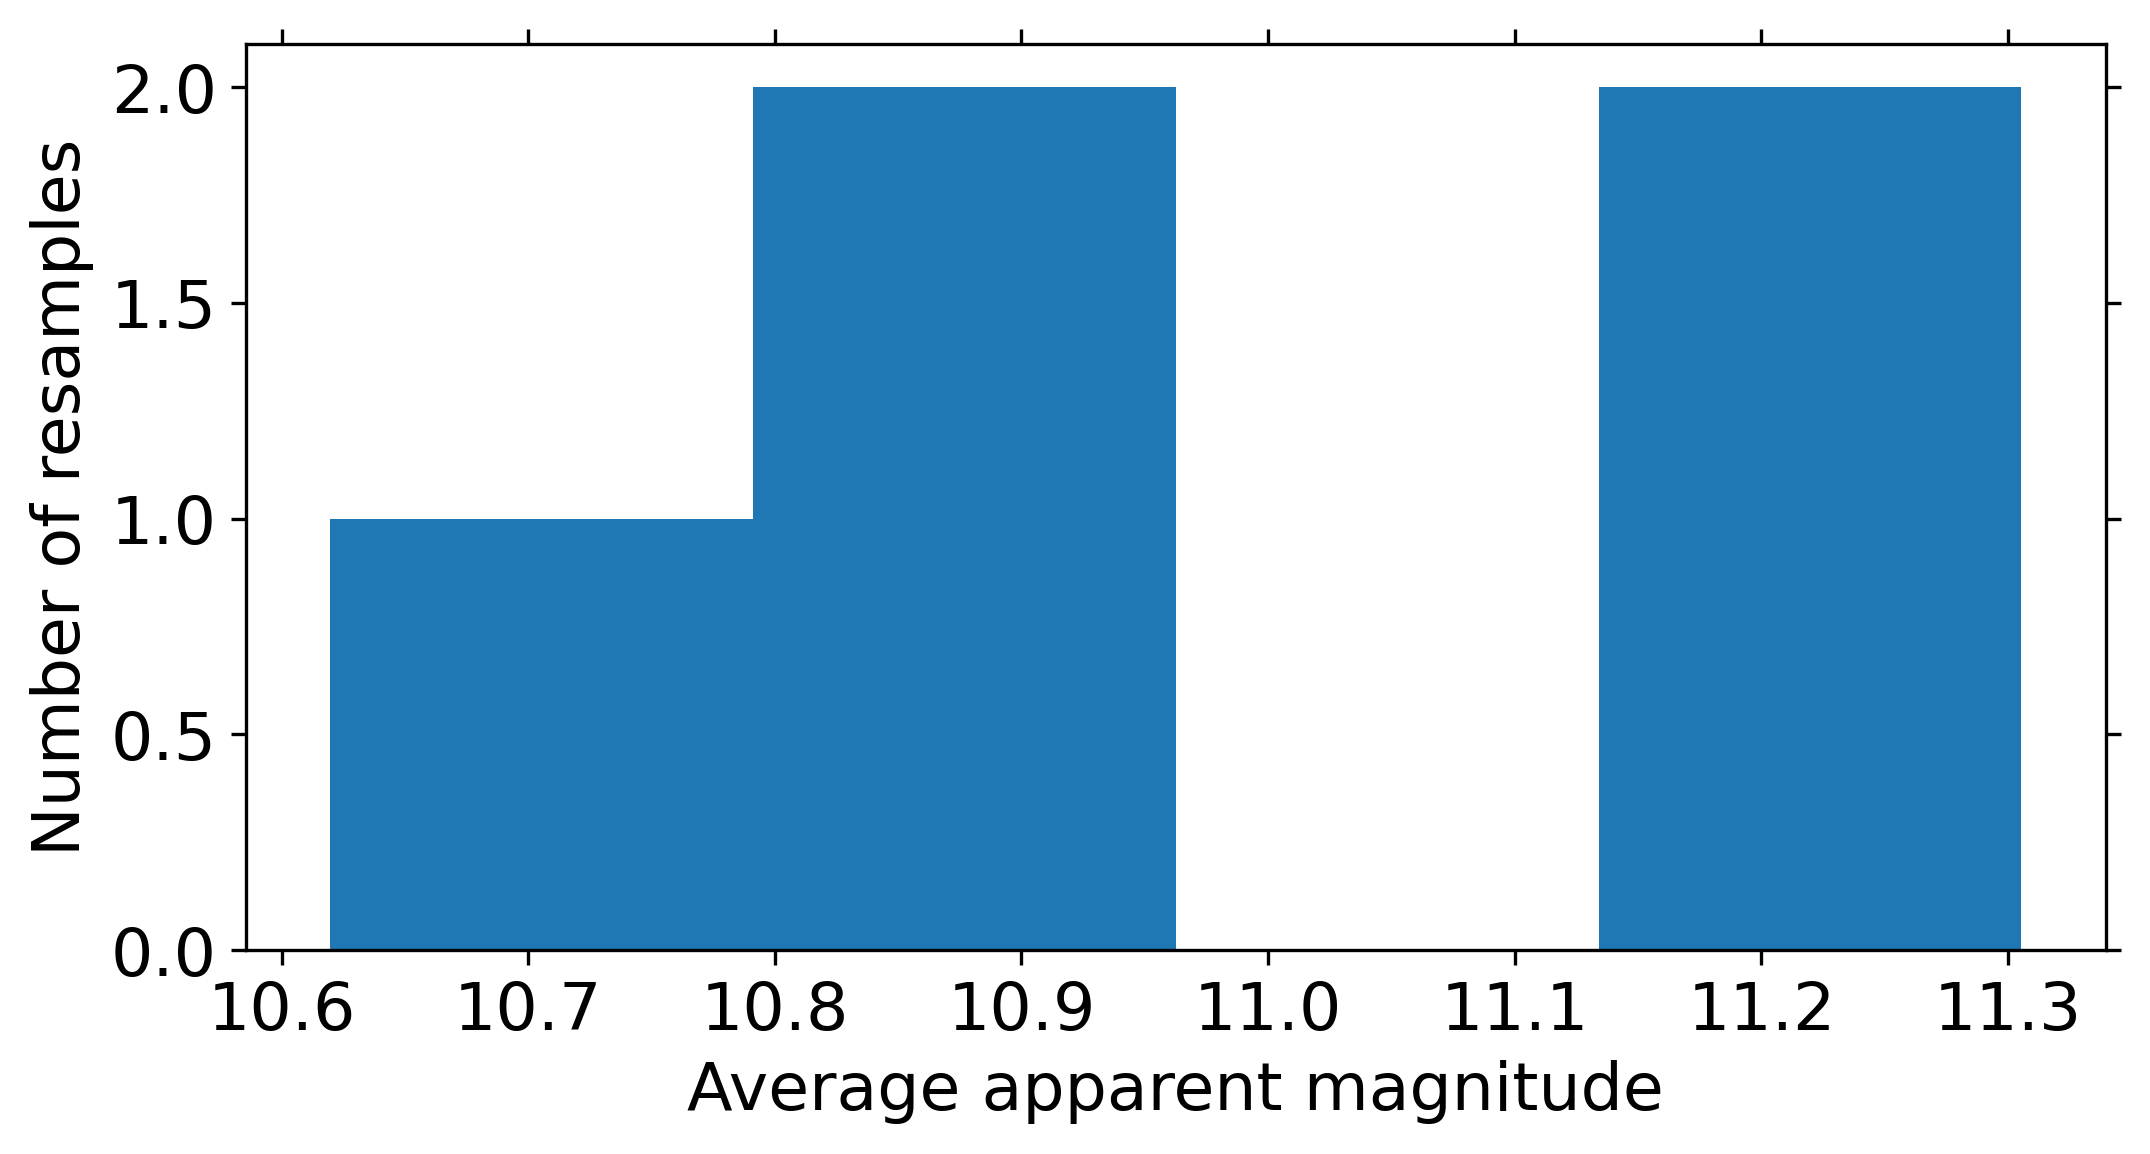

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
plt.hist(boots, bins=4)
ax.set_xlabel("Average apparent magnitude", fontproperties=font_prop)
ax.set_ylabel("Number of resamples", fontproperties=font_prop)
ax.tick_params(axis='both', which='major', labelsize=16, 
               top=True, right=True, bottom=True, left=True)
plt.show()

## 1d. Calculate the variance and standard deviation of `boots`.

In [6]:
boot_var = np.var(boots)
boot_stddev = np.sqrt(boot_var)
print(boot_stddev)
print(np.std(boots))

0.2372499233691391
0.2372499233691391


This standard deviation from the bootstraps, `boot_stddev`, gives you 1-sigma errors on the original mean of the data `star`.

In [7]:
print("%.2f +- %.2f" % (np.mean(star), boot_stddev))

10.64 +- 0.24


## 1e. Try with N log N resamples. 
From the lecture, N log(N) (where N is the number of samples in the original data set) is the number of bootstrap iterations you need to do to be able to assume a Gaussian distribution of the resamples. Redo steps 1b, 1c, and 1d here. Print the mean from your data and the 1-sigma error. 
Notice how the histogram and variance change when you use the correct number of bootstrap iterations. 

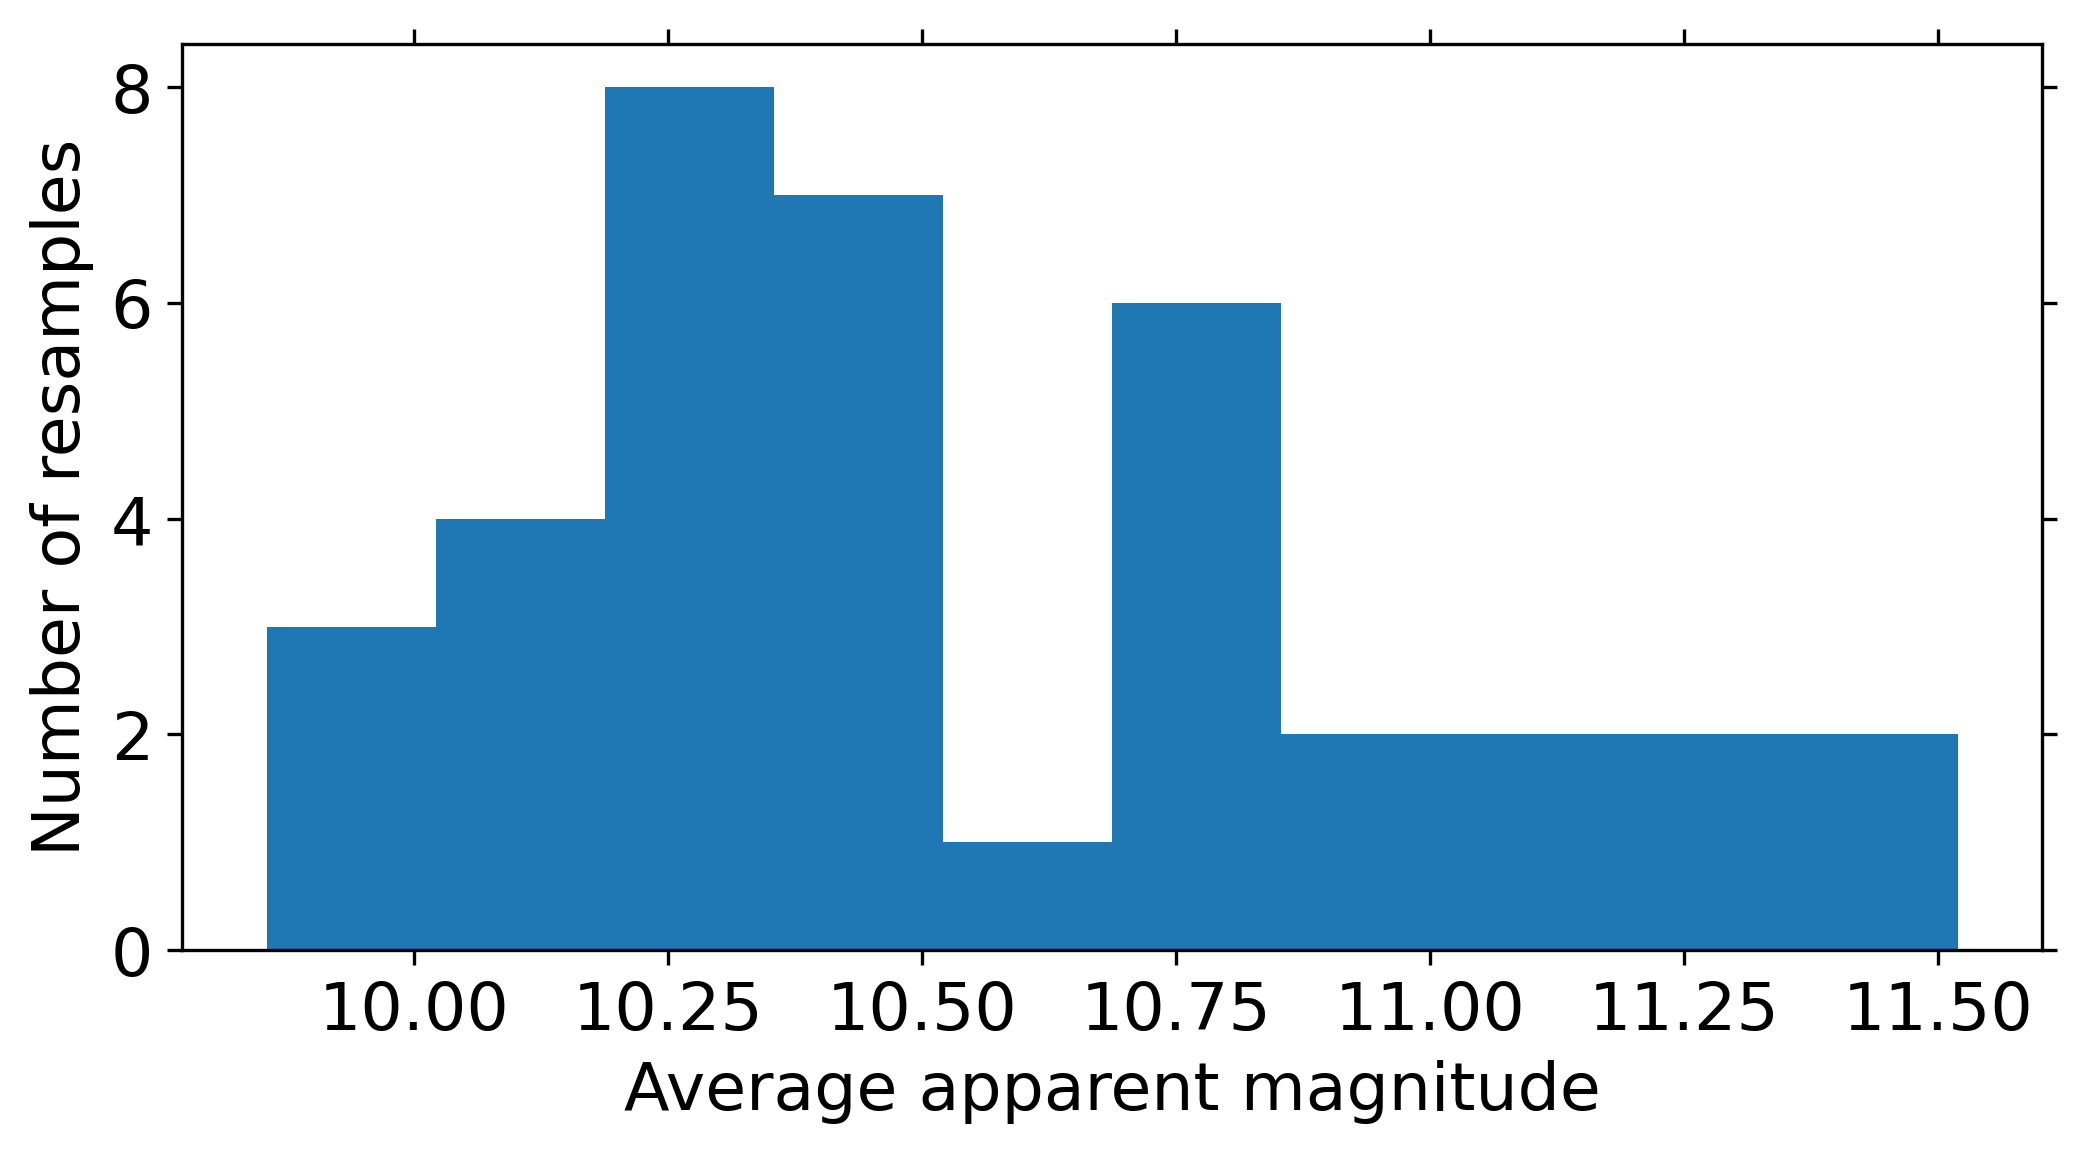

In [8]:
boots = np.asarray([])
boot_num = np.ceil(len(star) * np.log(len(star)))
for i in range(int(boot_num)):
    temp = np.random.choice(star, size=len(star), replace=True)
    boots = np.append(boots, np.mean(temp))
    
boot_var = np.var(boots)
boot_stddev = np.sqrt(boot_var)

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
plt.hist(boots, bins=10)
ax.set_xlabel("Average apparent magnitude", fontproperties=font_prop)
ax.set_ylabel("Number of resamples", fontproperties=font_prop)
ax.tick_params(axis='both', which='major', labelsize=16, 
               top=True, right=True, bottom=True, left=True)
plt.show()

In [9]:
print("%.2f +- %.2f" % (np.mean(star), boot_stddev))

10.64 +- 0.43


## 1f. Now try again with way more bootstraps than N log(N). 
Again redoing steps 1b, 1c, and 1d here.
Most of these are unnecessary and just take up computational resources, but with a small set like this, you can play around.

10.64 +- 0.38


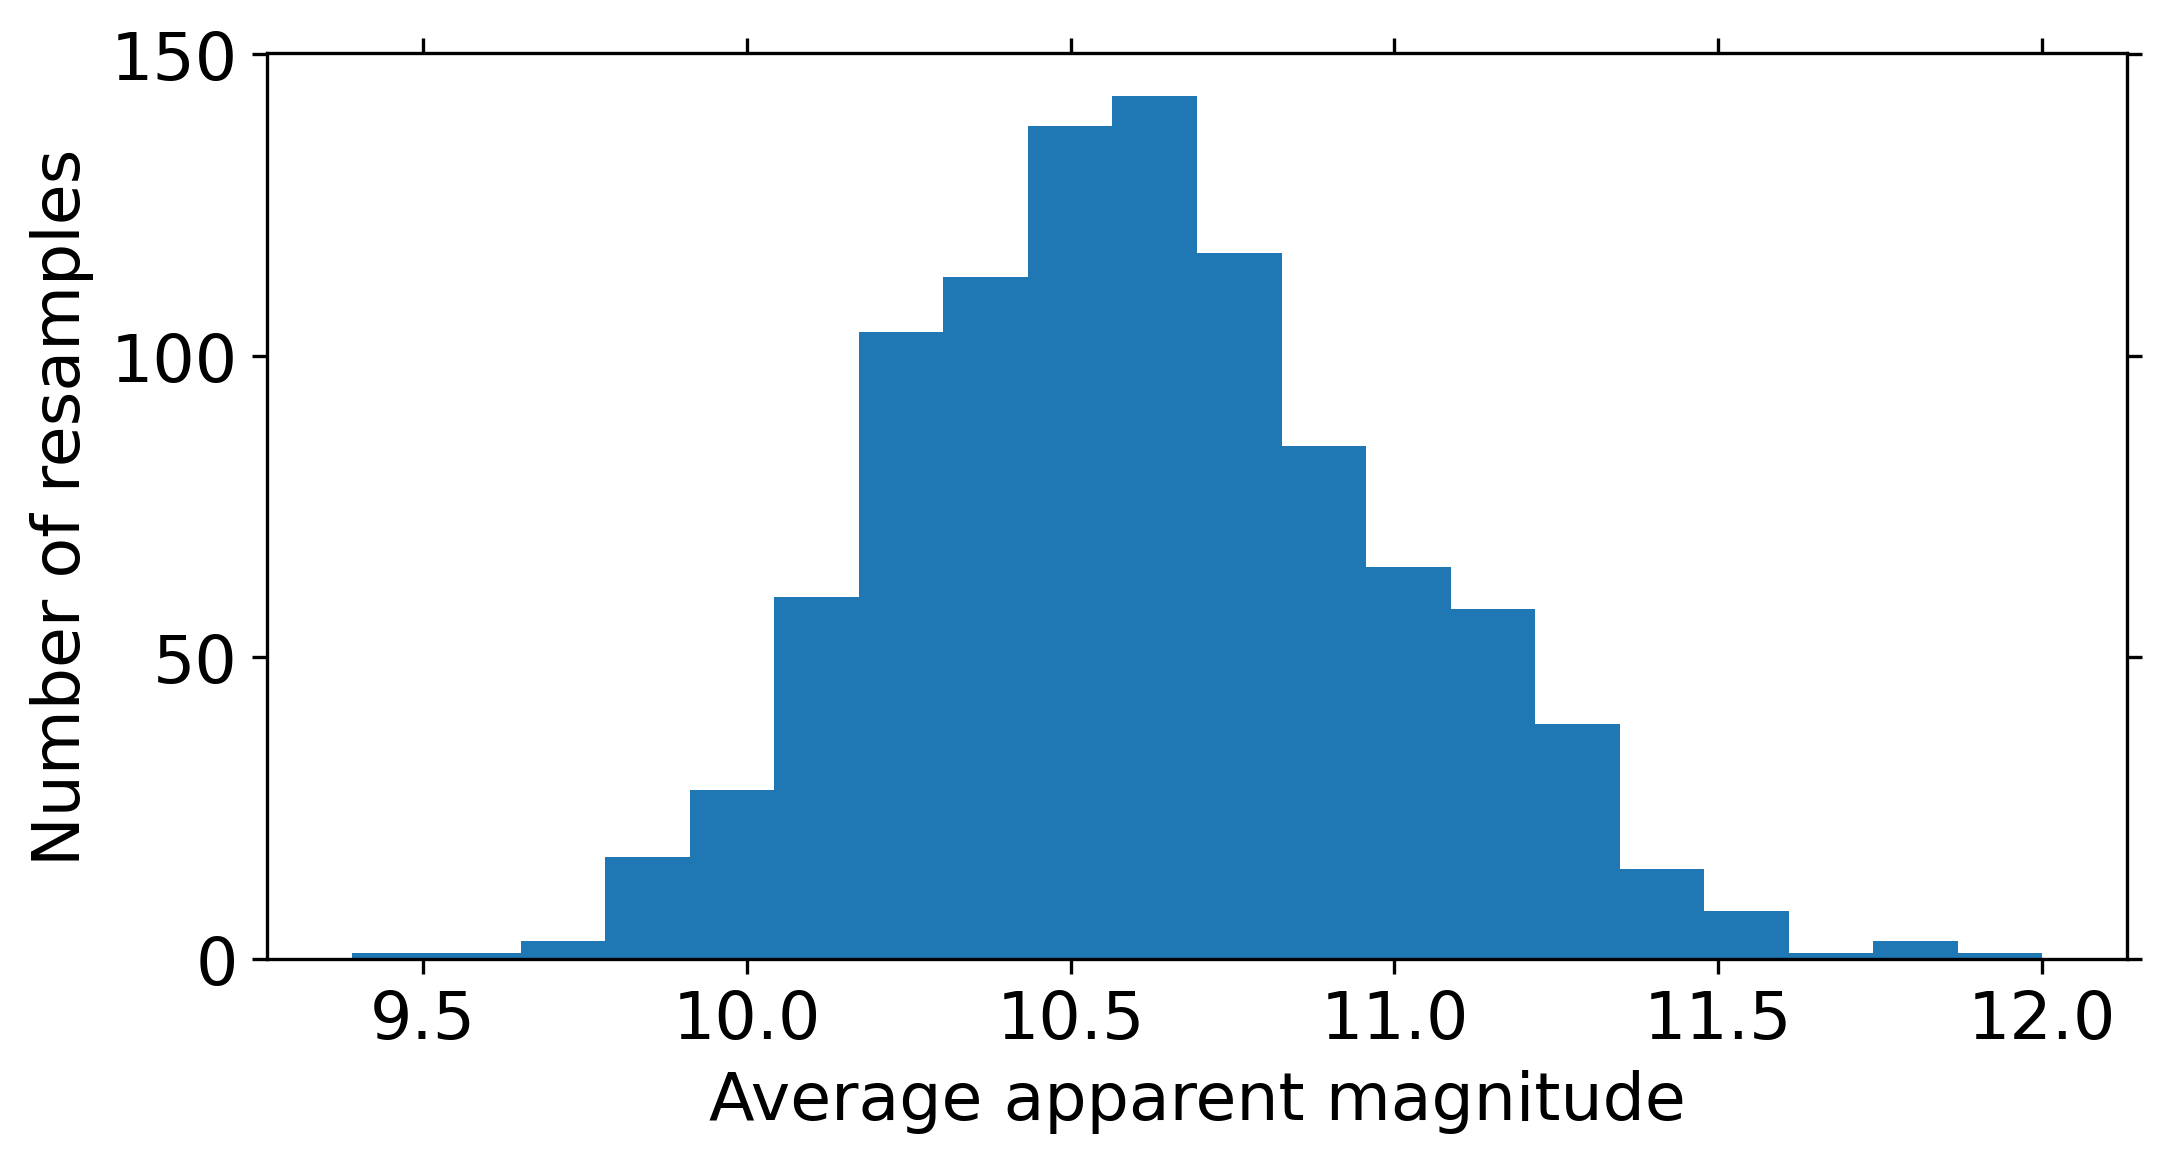

In [10]:
boots = np.asarray([])
boot_num = 1000
for i in range(int(boot_num)):
    temp = np.random.choice(star, size=len(star), replace=True)
    boots = np.append(boots, np.mean(temp))
    
boot_var = np.var(boots)
boot_stddev = np.sqrt(boot_var)

print("%.2f +- %.2f" % (np.mean(star), boot_stddev))

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
plt.hist(boots, bins=20)
ax.set_xlabel("Average apparent magnitude", fontproperties=font_prop)
ax.set_ylabel("Number of resamples", fontproperties=font_prop)
ax.tick_params(axis='both', which='major', labelsize=16, 
               top=True, right=True, bottom=True, left=True)
plt.show()

## 1g. Use a larger sample set.
14 data points is a pretty tiny sample set. Pretend that the star was visible again and you were able to hire an undergraduate student for the summer, so you got another 86 days of magnitude data for the star. 
Resample with bootstrap (using N log N) and see what your error is. Print the original mean of this new data set and the 1-sigma error you get from the bootstrapping.

10.23 +- 0.19


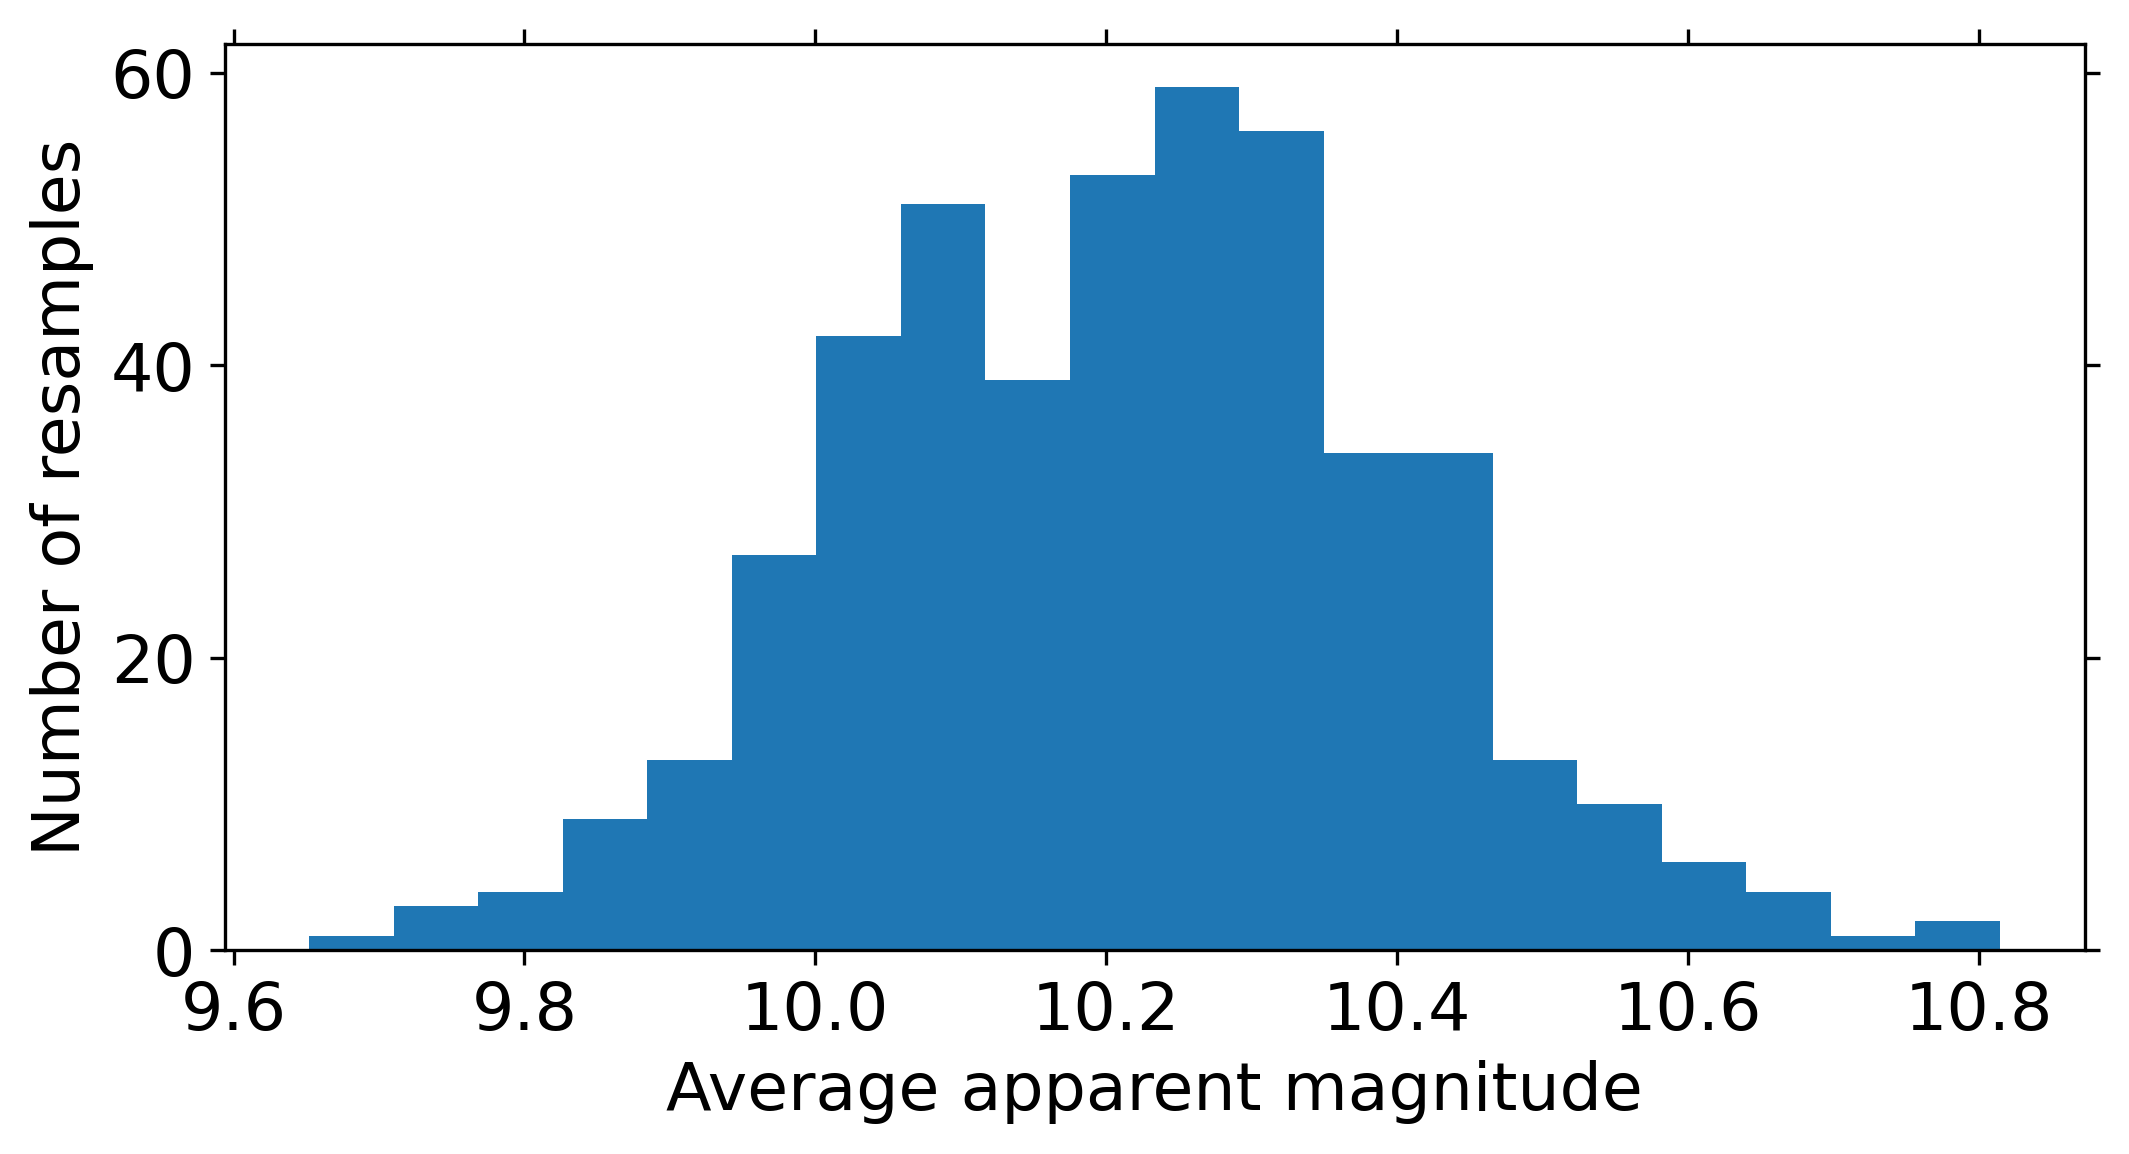

In [11]:
star = np.random.normal(loc=10, scale=2, size=100)
boots = np.asarray([])
boot_num = np.ceil(len(star) * np.log(len(star)))
for i in range(int(boot_num)):
    temp = np.random.choice(star, size=len(star), replace=True)
    boots = np.append(boots, np.mean(temp))
    
boot_var = np.var(boots)
boot_stddev = np.sqrt(boot_var)

print("%.2f +- %.2f" % (np.mean(star), boot_stddev))

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
plt.hist(boots, bins=20)
ax.set_xlabel("Average apparent magnitude", fontproperties=font_prop)
ax.set_ylabel("Number of resamples", fontproperties=font_prop)
ax.tick_params(axis='both', which='major', labelsize=16, 
               top=True, right=True, bottom=True, left=True)
plt.show()


Notice the correlation between the number of points in the original sample, the number of bootstrap iterations you do, and how accurate and precise your result is.

# Problem 2: Black hole 'happiness' variance as a function of X-ray counts
Congratulations! You are a scientific crew member aboard a starship only 1 kpc from the Milky Way galactic center. Your chief scientific officer wants to test a hypothesis that stellar black holes are sentient and have feelings. You're go

## 2a. Over a few kiloseconds, you take 40 observations of X-ray photon counts of a nearby black hole X-ray binary.
The mean photon count rate is 3000. As you define your data array `photons`, remember that X-ray counts are Poisson-distributed!

In [12]:
photons = np.random.poisson(lam=3000, size=40)

The chief scientific officer gives you the following function to calculate the value of black hole 'happiness'. You want to estimate the variance on the 'happiness', but can't do propagation of errors. Perhaps we don't know if there is a little unknown correlation or bias.

In [13]:
def bh_happy(data):
    temp1 = np.mean(data)
    temp2 = np.mean(np.diff(data))
    happiness = (temp1 + temp2) / 2
    return happiness
print(bh_happy(photons))

1496.9528846153846


## 2b. Compute the jackknife estimate of the black hole happiness.
Resample (N-1) samples without replacement, where N is the number of original samples, and calculate the black hole happiness. Do this N times, and call your array of happiness estimates `jacks`.

In [14]:
jacks = np.asarray([])
jacks_num = len(photons)-1
for i in range(int(len(photons))):
    temp = np.random.choice(photons, size=jacks_num, replace=False)
    jacks = np.append(jacks, bh_happy(temp))

In [15]:
print(jacks)

[1498.2611336  1499.94230769 1499.04824561 1496.12483131 1498.06072874
 1498.47165992 1498.12955466 1498.1379892  1496.68353576 1499.25641026
 1497.33265857 1497.35458839 1495.25168691 1496.02294197 1497.86504723
 1496.38225371 1498.54251012 1496.11605938 1496.37854251 1499.71929825
 1499.02192982 1497.45614035 1497.93353576 1497.73987854 1498.65789474
 1499.86403509 1499.53879892 1498.87719298 1498.34008097 1496.00910931
 1496.83164642 1497.99932524 1499.10020243 1497.89304993 1496.41160594
 1496.90789474 1497.54588394 1496.24493927 1497.42037787 1497.62483131]


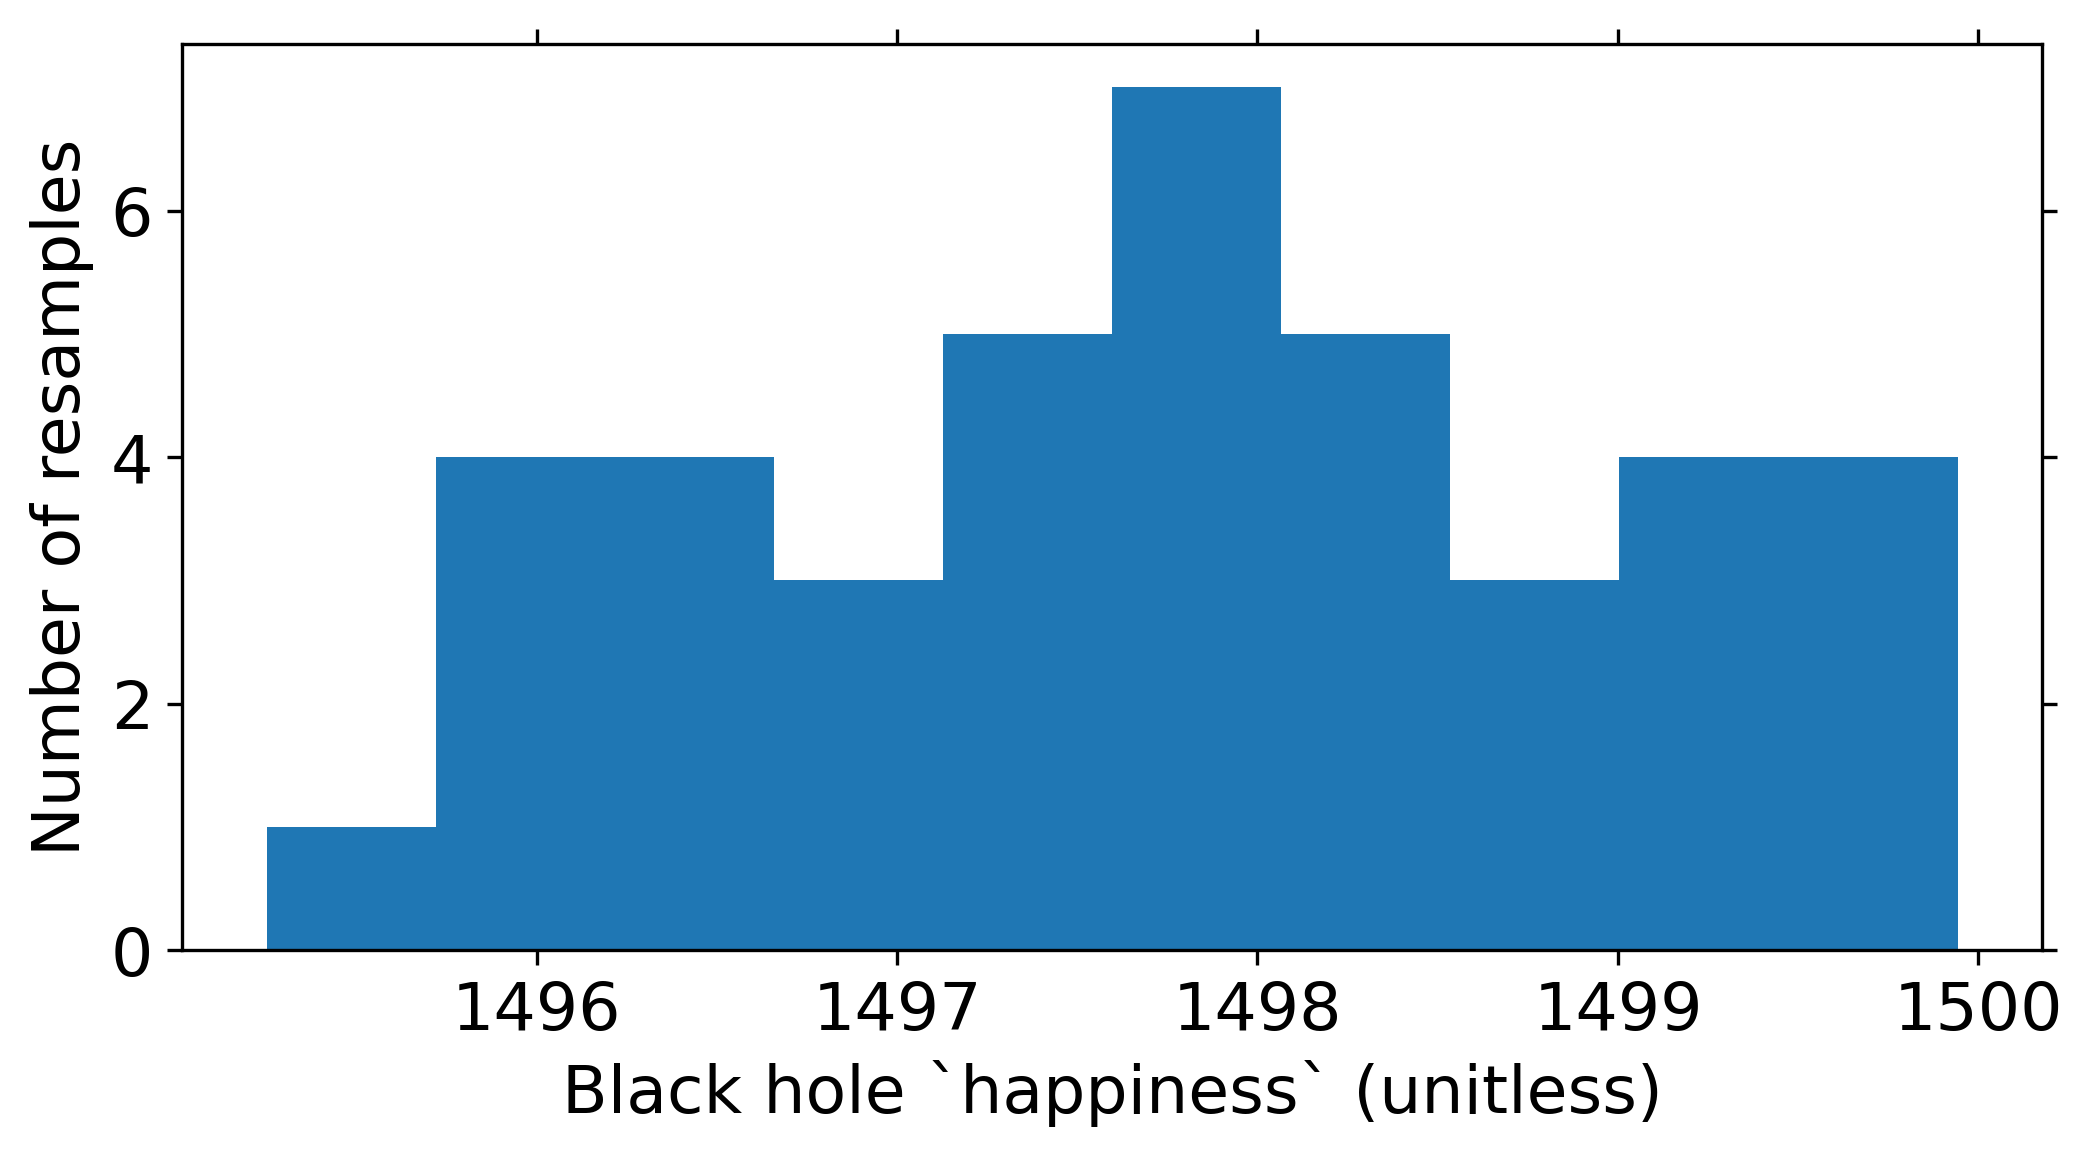

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
plt.hist(jacks, bins=10)
ax.set_xlabel("Black hole `happiness` (unitless)", fontproperties=font_prop)
ax.set_ylabel("Number of resamples", fontproperties=font_prop)
ax.tick_params(axis='both', which='major', labelsize=16, 
               top=True, right=True, bottom=True, left=True)
plt.show()

## 2c. Compute the variance of `jacks`, the jackknife estimate of the variance of black hole happiness

In [17]:
jack_var = np.var(jacks)

In [18]:
print("Jackknife variance estimate: ", jack_var)

Jackknife variance estimate:  1.4190835424754318


## 2d. At which number of jackknifes does it converge?
Redo part 2b and 2c again, making `jacks` different lengths (doing the N-1 jackknife resampling J times). Try for values of J < N, J > N, and J >> N (you already did J = N in 2b!). Can you find approximately where the variance converges? Plotting histograms may help along the way, if you like visual information.

# Problem 3: literature search!

Look on ADS to find an example of a paper using the jackknife or bootstrap technique for a research topic related to your astro sub-field. See if you can figure out what their original data is, what their 'estimator' or function is (it might just be the mean of the data set), why they applied the bootstrap or jackknife, and whether they used one of the alternative approaches (like block jackknife or smooth bootstrap).

# Bonus problem 4: 
Let's say for problem 1 that the first 7 days of stellar magnitude measurements had distribution scale of 2, but the next time the star was visible, the seeing was worse from the telescope site, so the next 21 days of measurements had a distribution scale of 4. Define a probability `p` associated with each magnitude measurement in `star` that you use in the resampling, instead of the standard uniform sampling. How does this change the histogram and variance? (for future reference, uniform sampling should be fine for most use cases, this is just to play around and get a better intuition for how the inputs affect the output)

# Bonus problem 5: bootstrap resampling from a 2-D array

2d array, your result is the average along the rows, but there's some mild correlation between adjacent columns. Resample the columns to get the 1-sigma error for each data point in the mean 1D array!

# Bonus problem 6: try the 'delete-d' or 'block' jackknife technique
Use the setup from problem 1 or 2 (or something similar you come up with). Remember, jackknife works best for small sample populations with linear statistics or estimators (like means), not as well for non-smooth and/or non-linear cases.